In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls "/content/gdrive/My Drive/DS/ml-100k"

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [3]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

train = pd.read_csv("/content/gdrive/My Drive/DS/ml-100k/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/My Drive/DS/ml-100k/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

In [4]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

users

tensor([  1,   1,   1,  ..., 943, 943, 943])

In [13]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

In [16]:
optimizer = torch.optim.Adam([P,Q], lr = 0.1)
X = []
Y = []
Y_test = []

for epoch in range(1001):
  hypo = (P[items] * Q[users]).sum(dim = 1)
  cost = F.mse_loss(hypo, ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  X.append(epoch)
  Y.append(cost)

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

epoch: 0, cost: 23.940563
epoch: 100, cost: 0.568334
epoch: 200, cost: 0.496013
epoch: 300, cost: 0.473096
epoch: 400, cost: 0.463167
epoch: 500, cost: 0.457312
epoch: 600, cost: 0.453400
epoch: 700, cost: 0.450611
epoch: 800, cost: 0.448424
epoch: 900, cost: 0.446632
epoch: 1000, cost: 0.445163


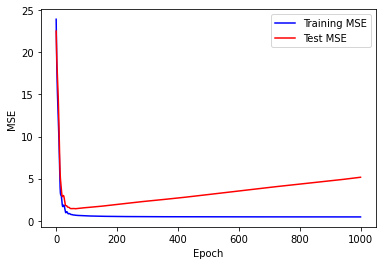

In [17]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

In [25]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P,Q], lr = 0.1)
X = []
Y = []
Y_test = []

lambda_P = 0.0001
lambda_Q = 0.0001

for epoch in range(1001):
  hypo = (P[items] * Q[users]).sum(dim = 1)
  mse = F.mse_loss(hypo, ratings)
  cost = mse + lambda_P * (P**2).sum() + lambda_Q *(Q ** 2).sum()
  

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  X.append(epoch)
  Y.append(mse.item())
  Y_test.append(mse_test.item())

  with torch.no_grad():

    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    mse_test = F.mse_loss(hypo_test, ratings_test)

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, mse: {mse}, mse_test : {mse_test}")

epoch: 0, mse: 23.751380920410156, mse_test : 21.382217407226562
epoch: 100, mse: 0.6949196457862854, mse_test : 1.0573499202728271
epoch: 200, mse: 0.6442418098449707, mse_test : 1.0566827058792114
epoch: 300, mse: 0.6332299113273621, mse_test : 1.0565177202224731
epoch: 400, mse: 0.6303738355636597, mse_test : 1.056144118309021
epoch: 500, mse: 0.6288658976554871, mse_test : 1.055864691734314
epoch: 600, mse: 0.6278494596481323, mse_test : 1.0555577278137207
epoch: 700, mse: 0.6272767186164856, mse_test : 1.0556021928787231
epoch: 800, mse: 0.626937985420227, mse_test : 1.0561672449111938
epoch: 900, mse: 0.6267294883728027, mse_test : 1.0568408966064453
epoch: 1000, mse: 0.626614511013031, mse_test : 1.0573112964630127


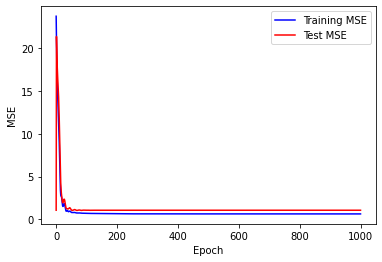

In [26]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

In [28]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_items = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P, Q, bias_items, bias_user], lr=0.1)

X = []
Y = []
Y_test = []

lambda_P = 0.0001
lambda_Q = 0.0001
lambda_BI = 0.001
lambda_BU = 0.001

for epoch in range(1001):
  hypo = (P[items] * Q[users]).sum(dim = 1) + mean + bias_items[items] + bias_user[users]
  mse = F.mse_loss(hypo, ratings)
  cost = mse + lambda_P * (P**2).sum() + lambda_Q *(Q ** 2).sum() + lambda_BI * (bias_items ** 2).sum() + lambda_BU * (bias_user ** 2).sum()
  

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  X.append(epoch)
  Y.append(mse.item())
  Y_test.append(mse_test.item())

  with torch.no_grad():

    hypo_test = (P[items_test] * Q[users_test]).sum(dim = 1) + mean + bias_items[items_test] + bias_user[users_test]
    mse_test = F.mse_loss(hypo_test, ratings_test)

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, mse: {mse}, mse_test : {mse_test}")

epoch: 0, mse: 13.10999870300293, mse_test : 10.012213706970215
epoch: 100, mse: 0.633704662322998, mse_test : 0.9297987222671509
epoch: 200, mse: 0.6090410351753235, mse_test : 0.9202667474746704
epoch: 300, mse: 0.6042695045471191, mse_test : 0.9149354100227356
epoch: 400, mse: 0.602924108505249, mse_test : 0.9129859805107117
epoch: 500, mse: 0.6024181246757507, mse_test : 0.9117901921272278
epoch: 600, mse: 0.6020928025245667, mse_test : 0.9107620716094971
epoch: 700, mse: 0.6019647717475891, mse_test : 0.910403847694397
epoch: 800, mse: 0.6019353270530701, mse_test : 0.910348117351532
epoch: 900, mse: 0.601921021938324, mse_test : 0.9102801084518433
epoch: 1000, mse: 0.6019350290298462, mse_test : 0.9102380871772766


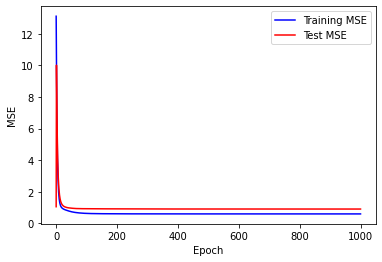

In [29]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()